<a href="https://colab.research.google.com/github/KeonhoChu/Health_Bio_AI/blob/main/Heart_Attack_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ROCAUC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/Heart Attack Analysis & Prediction Dataset/heart.csv')


In [ ]:
# Min-Max normalization
cols = ['trtbps', 'chol', 'thalachh', 'oldpeak', 'age']
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum)/ (maximum - minimum)

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [ ]:
# print(df[["sex", "output"]].groupby(['sex']).mean())
# print(df[["cp", "output"]].groupby(['cp']).mean())
# print(df[["fbs", "output"]].groupby(['fbs']).mean())
# print (df[["exng", "output"]].groupby(['exng']).mean())
# print (df[["restecg", "output"]].groupby(['restecg']).mean())
# print (df[["slp", "output"]].groupby(['slp']).mean())
# print (df[["thall", "output"]].groupby(['thall']).mean())
# print (df[["caa", "output"]].groupby(['caa']).mean())

In [ ]:
X = df.drop("output", axis=1)

In [ ]:
y = df['output']

In [ ]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=65)

##XGBoost

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
#Train set
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_train)
xgb = accuracy_score(y_train, pred_xgb)
print(xgb)

1.0


In [ ]:
#Test set
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.8524590163934426


<Axes: >

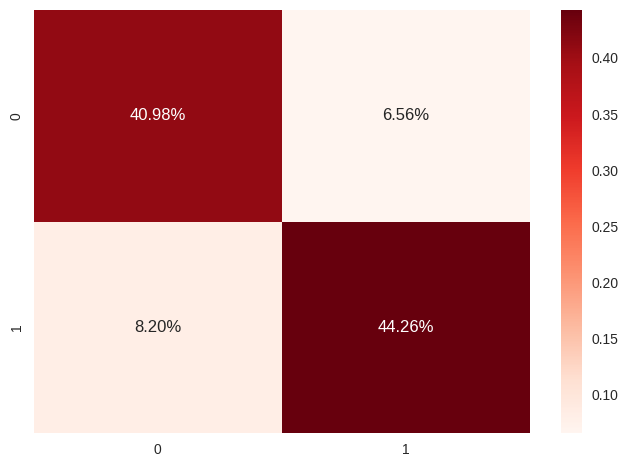

In [ ]:
cm_xgb = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm_xgb/np.sum(cm_xgb), annot = True, fmt=  '0.2%', cmap = 'Reds')

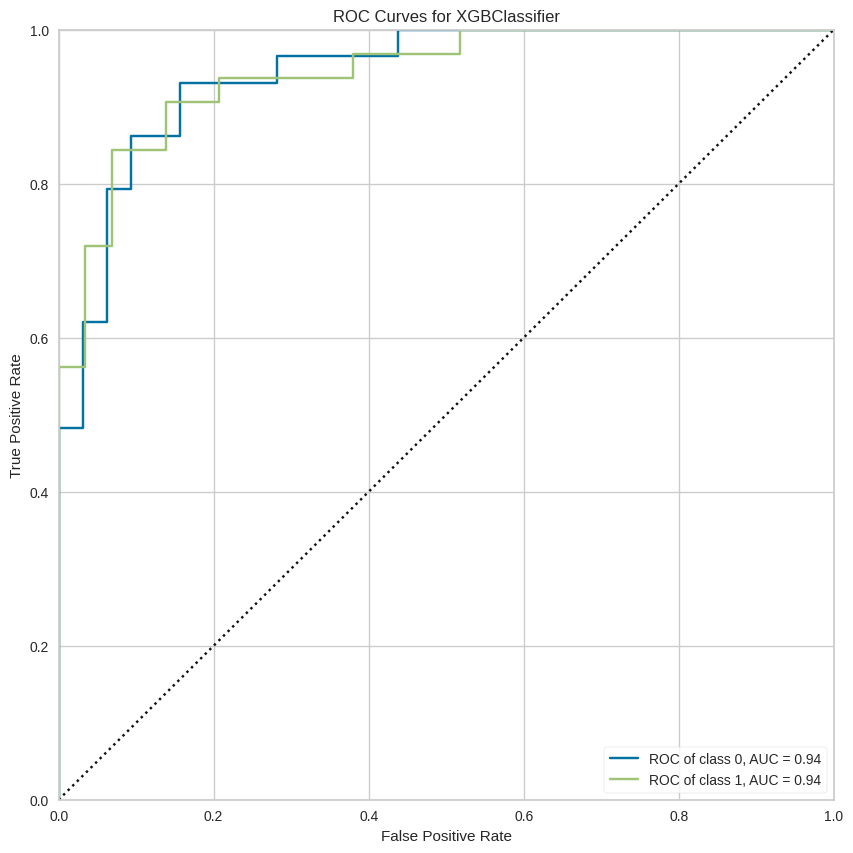

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
fig,ax= plt.subplots(figsize=(10,10))
roc_viz= ROCAUC(model_xgb,micro=False,macro=False, classes=["0", "1"])
roc_viz.fit(X_train,y_train)
roc_viz.score(X_test, y_test)
roc_viz.show()

<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

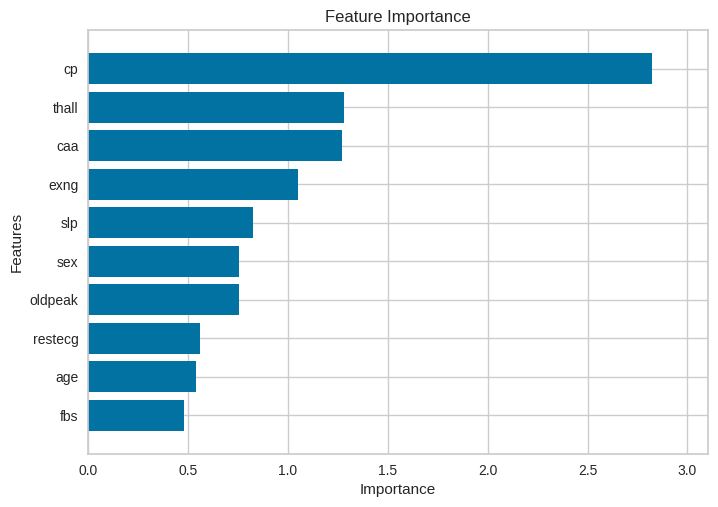

In [ ]:
# feature importance 시각화
plot_importance(model_xgb, height=0.8, max_num_features=10, xlabel="Importance",
                ylabel="Features", title="Feature Importance", show_values=False, importance_type='gain')

In [ ]:
# !pip install shap

In [ ]:
# #XGBoost Shap value

# import shap

# # SHAP explainer 생성
# explainer = shap.Explainer(model_xgb)

# # SHAP values 계산
# shap_values = explainer(X_train)

# # 모델 예측에 대한 SHAP 요약값 계산
# shap.summary_plot(shap_values, X_train)

# # 개별 샘플에 대한 SHAP 값 계산
# shap_values_single = explainer(X_train.iloc[0:1])

# # 개별 샘플에 대한 SHAP 값 시각화
# shap.plots.waterfall(shap_values_single[0], max_display=10)

##Kneighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Train Set
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
pred_kn = model_kn.predict(X_train)
kn = accuracy_score(y_train, pred_kn)
print(kn)


0.8677685950413223


In [ ]:
#Test Set
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
pred_kn = model_kn.predict(X_test)
kn = accuracy_score(y_test, pred_kn)
print(kn)


0.9180327868852459


<Axes: >

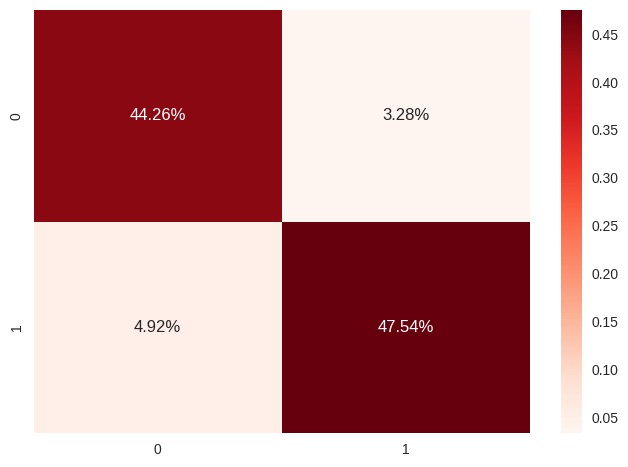

In [ ]:
cm_kn = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm_kn/np.sum(cm_kn), annot = True, fmt=  '0.2%', cmap = 'Reds')

##SVC

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
#Train set
model_svm = SVC()
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_train)
sv = accuracy_score(y_train, pred_svm)
print(sv)

0.8677685950413223


In [ ]:
#Test set
model_svm = SVC()
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.9344262295081968


<Axes: >

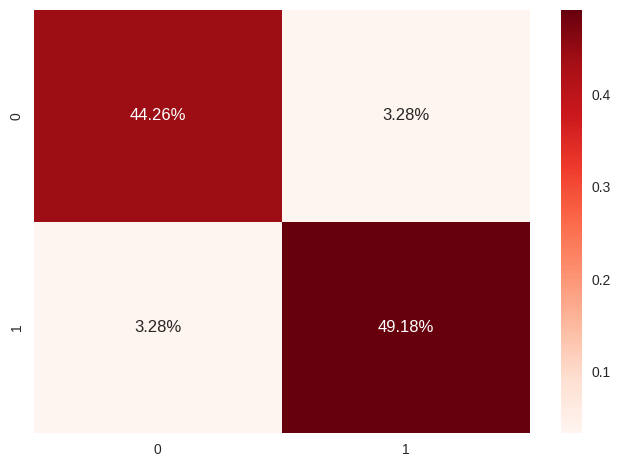

In [ ]:
cm_sv = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm_sv/np.sum(cm_sv), annot = True, fmt=  '0.2%', cmap = 'Reds')

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Train set
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_train)
rf = accuracy_score(y_train, pred_rf)
print(rf)

1.0


In [ ]:
#Test set
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.9180327868852459


<Axes: >

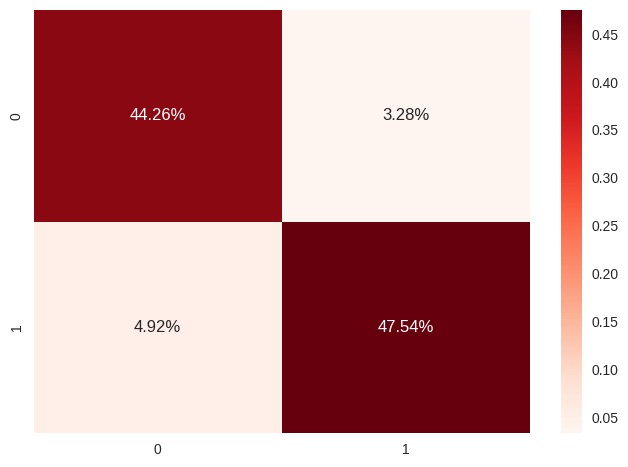

In [ ]:
cm_rf = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm_rf/np.sum(cm_rf), annot = True, fmt=  '0.2%', cmap = 'Reds')

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Train set
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
pred_dt = model_dt.predict(X_train)
dt = accuracy_score(y_train, pred_dt)
print(dt)

1.0


In [ ]:
#Test set
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
pred_dt = model_dt.predict(X_test)
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.8852459016393442


<Axes: >

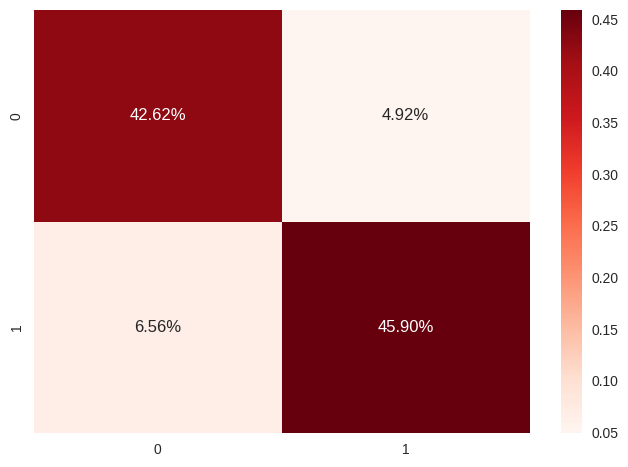

In [ ]:
cm_dt = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm_dt/np.sum(cm_dt), annot = True, fmt=  '0.2%', cmap = 'Reds')

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Train set
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)
pred_lg = model_lg.predict(X_test)
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.9508196721311475


In [ ]:
#Test set
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)
pred_lg = model_lg.predict(X_test)
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.9508196721311475


<Axes: >

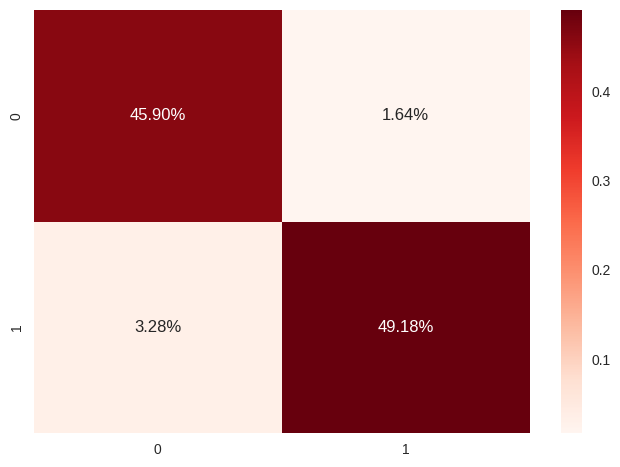

In [ ]:
cm_lg = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm_lg/np.sum(cm_lg), annot = True, fmt=  '0.2%', cmap = 'Reds')

,Model,Accuracy_score
0,Logistic Regression,0.950820
5,SVC,0.934426
2,Random Forest,0.918033
4,KNeighbours,0.918033
1,Decision Tree,0.885246
3,XGBoost,0.852459


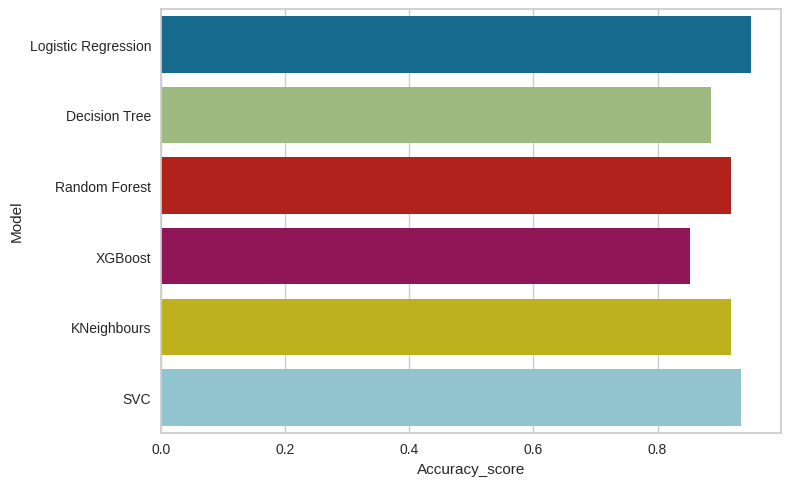

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVC'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)